In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (12,8) #Adjust the configuration of plots we will create

#read in data

df = pd.read_csv(r'C:\Users\Will\Downloads\movies\movies.csv')

In [2]:
# Checking the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Find missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for Columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# change data type and getting rid of decimal units on column budget and gross
df = df.fillna(0)
df["budget"] = df["budget"].astype("int64")
df["votes"] = df["votes"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [6]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [7]:
cols_to_move = ["name","budget" , "gross", "votes"]

df = df[cols_to_move + [col for col in df.columns if col not in cols_to_move]]

df


,name,budget,gross,votes,rating,genre,year,released,score,director,writer,star,country,company,runtime
0,The Shining,19000000,46998772,927000,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146.0
1,The Blue Lagoon,4500000,58853106,65000,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,18000000,538375067,1200000,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124.0
3,Airplane!,3500000,83453539,221000,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88.0
4,Caddyshack,6000000,39846344,108000,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,7000,0,18,0,Drama,2020,"October 23, 2020 (United States)",3.1,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,0,90.0
7664,Dream Round,0,0,36,0,Comedy,2020,"February 7, 2020 (United States)",4.7,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment,90.0
7665,Saving Mbango,58750,0,29,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions,0.0
7666,It's Just Us,15000,0,0,0,Drama,2020,"October 1, 2020 (United States)",0.0,James Randall,James Randall,Christina Roz,United States,0,120.0


In [8]:
#df.sort_values(by=["gross"], inplace=False, ascending=False)

In [9]:
#Shows all the values on the df
pd.set_option("display.max_rows", None)


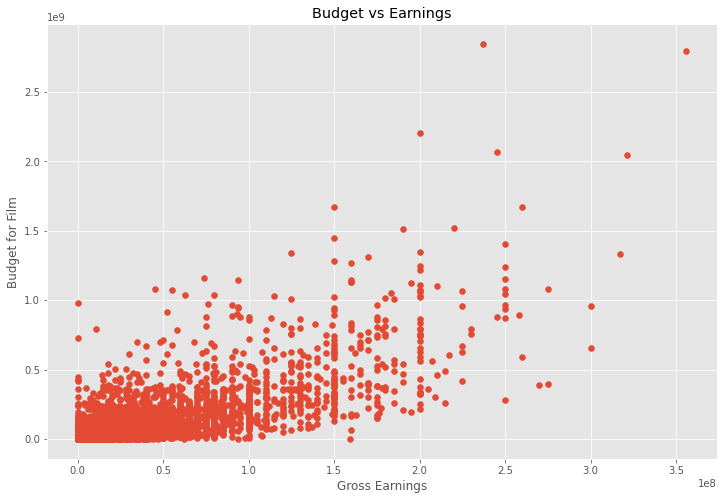

In [14]:
# scatter plot with budget vs gross

plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Earnings")

plt.xlabel("Gross Earnings")

plt.ylabel("Budget for Film")

plt.show()

In [17]:
df.head()

,name,budget,gross,votes,rating,genre,year,released,score,director,writer,star,country,company,runtime
5445,Avatar,237000000,2847246203,1100000,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162.0
7445,Avengers: Endgame,356000000,2797501328,903000,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181.0
3045,Titanic,200000000,2201647264,1100000,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,245000000,2069521700,876000,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,138.0
7244,Avengers: Infinity War,321000000,2048359754,897000,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,149.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

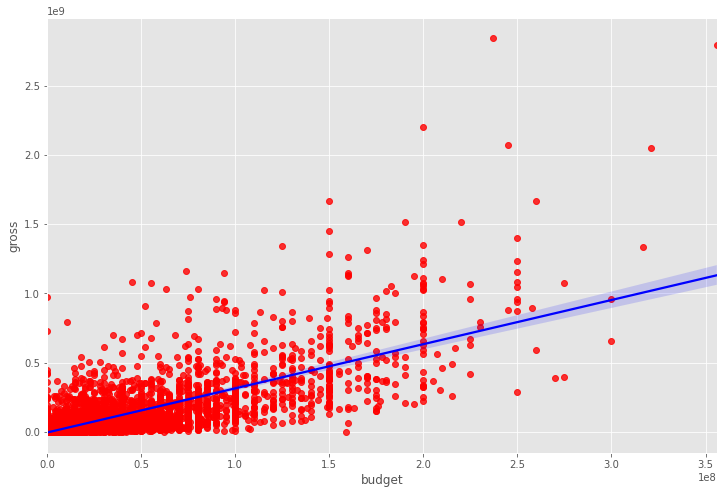

In [21]:
# regresion plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data = df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [22]:
# let's look at correlation
df.corr(method=pearson) #methods are pearson, kendall, spearman

,budget,gross,votes,year,score,runtime
budget,1.000000,0.750157,0.486931,0.309212,0.056863,0.268372
gross,0.750157,1.000000,0.632870,0.261900,0.186012,0.244339
votes,0.486931,0.632870,1.000000,0.222427,0.407101,0.306984
year,0.309212,0.261900,0.222427,1.000000,0.092616,0.116358
score,0.056863,0.186012,0.407101,0.092616,1.000000,0.394564
runtime,0.268372,0.244339,0.306984,0.116358,0.394564,1.000000


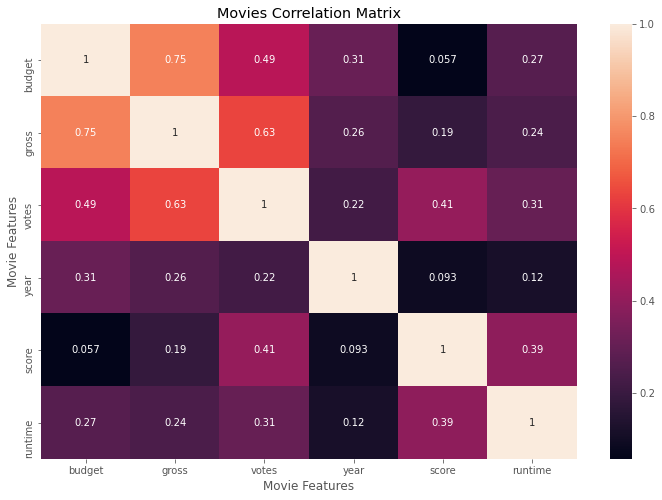

In [25]:
# Visulazing correlation matrix

correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title("Movies Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [29]:
#numerizing NOT numeric values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

#df_numerized

# every NaN value has been replaced with numerical code/ same name = same numerical value

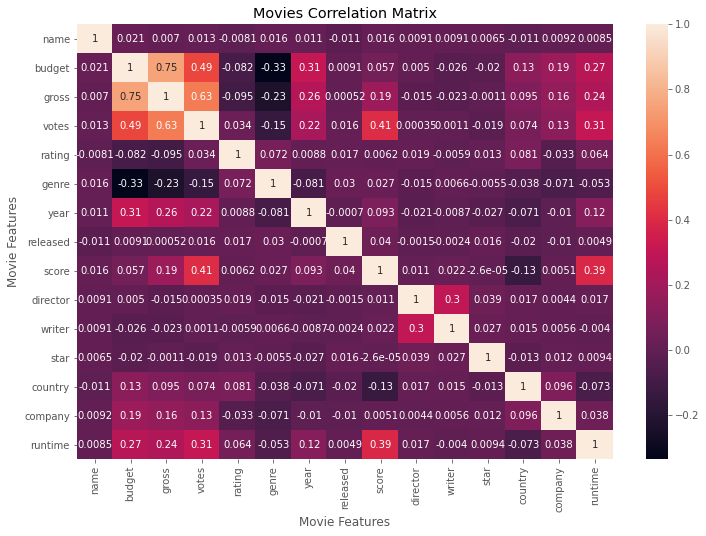

In [30]:
correlation_matrix = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title("Movies Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [ ]:
# votes and budget have the highest correlation to gross earnings
